In [1]:
import numpy as np
import pandas as pd
import math
import random
import csv
import matplotlib.pyplot as plt

In [2]:
def getdataset(A, w, p, l):          #A:振幅 w:角速度 p:初相 l:几个周期
    T = 2*math.pi/abs(w)             #周期
    r = l*T/2                          #定义域
    x_dataset = []                   #存储自变量
    y_dataset = []                   #存储因变量
    #将定义域等分为20份，从每一份中随机取一个自变量
    for i in range(-10, 10, 1):
        left = i*r/10                #左边界
        right = (i+1)*r/10          #右边界
        C = random.uniform(0, 1)    #随机扰动值
        x = random.uniform(left, right)
        y = A*math.sin(w*x+p)+C
        x_dataset.append(x)
        y_dataset.append(y)
    return x_dataset,y_dataset
dataset = getdataset(2, 1, 0, 2)
dataset

([-6.033490929384736,
  -5.619979604676555,
  -4.77225763905483,
  -4.120787470146374,
  -3.7312599702801137,
  -2.71753568836227,
  -2.328079811274407,
  -1.6814617835560894,
  -1.0990959457338678,
  -0.21320808398186664,
  0.17624588176065725,
  1.17403515525701,
  1.7836715333784934,
  2.221067145747939,
  2.6435332552625024,
  3.6512009936484238,
  3.8190723135628994,
  4.441637297170316,
  5.654059517927275,
  5.818207538226144],
 [1.2032543434351992,
  1.5945086383317673,
  2.9206568577836958,
  2.068719096532934,
  1.1651771022133035,
  -0.80418702616663,
  -0.7098405931538314,
  -1.4237323397781396,
  -1.2827152467276501,
  0.44429706491317955,
  0.896794022677892,
  2.769380533748544,
  2.8858766934229423,
  2.04467583179132,
  1.4512151892607847,
  0.01191989061246368,
  -1.237034138541563,
  -1.039345847140789,
  -0.7706150752378178,
  -0.36532497668697694])

In [3]:
#将两个一维列标转化为一个二维列表便于存储为CSV文件
newdataset = list(zip(dataset[0],dataset[1]))
#将生成的数据集保存为D1.csv文件
with open("./D1.csv", "a", newline='', encoding='utf-8') as file:
    writer = csv.writer(file ,delimiter=',')
    writer.writerows(newdataset)

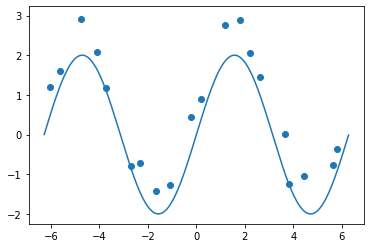

In [2]:
#绘制正弦曲线
data = pd.read_csv("D1.csv",header=None)

x=np.arange(-2*np.pi,2*np.pi,0.01)
y=2*np.sin(x)
x1 = data.iloc[:,0:1]
y1 = data.iloc[:,1]
plt.plot(x,y)
plt.scatter(x1,y1)
plt.savefig('./data.svg')
plt.show()